In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import time

In [10]:
def fx(x):
    return 1 / (1 + x ** 2)

In [11]:
def px(n):
    xs = np.linspace(-5, 5, n + 1)
    x = np.array(xs)
    arr = np.vander(x, increasing=True)
    y = []
    for xi in xs:
        y.append(fx(xi))
    a = np.linalg.solve(arr, y)
    pltx = np.linspace(-5, 5, 100)
    plty = []
    err = []
    for xii in pltx:
        val = 0
        for (i, ai) in enumerate(a):
            val += ai * (xii ** i)
        plty.append(val)
        err.append(abs(val - fx(xii)))
    plt.plot(pltx, plty)
    real = []
    for xii in pltx:
        real.append(fx(xii))
    plt.plot(pltx, real)
    plt.plot(pltx, err)
    plt.show()

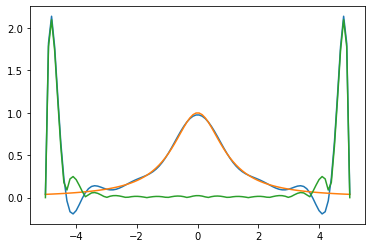

In [12]:
px(15)

In [13]:
def interpolation_error(n):
    err = []
    xs = np.linspace(-5, 5, n + 1)
    x = np.array(xs)
    arr = np.vander(x, increasing=True)
    y = []
    for xi in xs:
        y.append(fx(xi))
    a = np.linalg.solve(arr, y)
    pltx = np.linspace(-5, 5, 100)

    plty = []
    for xii in pltx:
        val = 0
        for (i, ai) in enumerate(a):
            val += ai * (xii ** i)
        plty.append(val)
        err.append(abs(val - fx(xii)))
    plt.plot(pltx, err)
    plt.show()

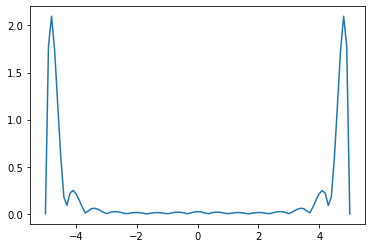

In [14]:
interpolation_error(15)

In [17]:
def czebyszew(n, a, b):
    xs = []
    for i in range(1, n + 1):
        x = (1 / 2) * (a + b) + (1 / 2) * (b - a) * np.cos(((2 * i - 1) / (2 * n)) * np.pi)
        xs.append(x)

    x = np.array(xs)
    arr = np.vander(x, increasing=True)
    y = []
    for xi in xs:
        y.append(fx(xi))
    a = np.linalg.solve(arr, y)
    pltx = np.linspace(-5, 5, 100)
    plty = []
    err = []
    for xii in pltx:
        val = 0
        for (i, ai) in enumerate(a):
            val += ai * (xii ** i)
        plty.append(val)
        err.append(abs(val - fx(xii)))
    plt.plot(pltx, plty)
    real = []
    for xii in pltx:
        real.append(fx(xii))
    plt.plot(pltx, real)
    plt.plot(pltx, err)
    plt.show()

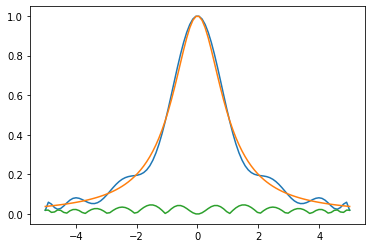

In [18]:
czebyszew(15, -5, 5)

In [23]:
def spline_elipso(a,b):
    t = np.linspace(0, 2*np.pi, 10)
    x = b*np.sin(t)
    y = a*np.cos(t)
    tck,u = interpolate.splprep([x,y], s=0)
    out = interpolate.splev(u, tck)
    real = np.linspace(0,2*np.pi, 1000)
    plt.figure()
    plt.plot(out[0], out[1], b*np.sin(real), a*np.cos(real))
    plt.legend(['Cubic Spline',"Real Plot"])
    plt.axis([a, b, a, b])
    plt.title('Spline of parametrically-defined curve')
    plt.show()

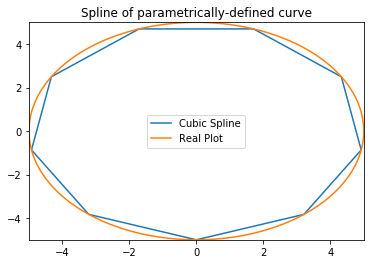

In [24]:
spline_elipso(-5,5)